In [26]:
import pandas as pd
from utils import *
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV,  cross_val_score
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
from sklearn.preprocessing import label_binarize

In [ ]:
#os.getcwd()

'/Users/gaby/Desktop/Repos/bootcamp_data/Proyecto_final/modelo_xgboost'

In [28]:
#%pip install openpyxl

In [29]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_final =cargar_datos_csv('../Preprocesado/clustering/full_dataset_preprocesed.csv')
df_final_label = cargar_datos_csv('../Preprocesado/clustering/full_dataset_preprocesed_con_label.csv')
df_final.head().T

Datos cargados correctamente: ../Preprocesado/clustering/full_dataset_preprocesed.csv
Datos cargados correctamente: ../Preprocesado/clustering/full_dataset_preprocesed_con_label.csv


,0,1,2,3,4
Unnamed: 0,0.000000,1.000000,2.000000,3.000000,4.000000
SnMouseAct,-1.360068,-1.360068,-1.360068,-1.360068,-1.360068
SnLeftClicked,-1.286354,-1.286354,-1.286354,-1.286354,-1.286354
SnRightClicked,-0.389114,-0.389114,-0.389114,-0.389114,-0.389114
SnDoubleClicked,-0.471028,-0.471028,-0.471028,-0.471028,-0.471028
SnWheel,-0.946991,-0.946991,-0.946991,-0.946991,-0.946991
SnDragged,-0.954855,-0.954855,-0.954855,-0.954855,-0.954855
SnMouseDistance,-1.500775,-1.500775,-1.500775,-1.500775,-1.500775
SnKeyStrokes,1.000000,1.000000,1.000000,1.000000,1.000000
SnChars,-1.326813,-1.326813,-1.326813,-1.326813,-1.326813


In [30]:
df_final_label.head().T

,0,1,2,3,4
Unnamed: 0.1,0.000000,1.000000,2.000000,3.000000,4.000000
Unnamed: 0,0.000000,1.000000,2.000000,3.000000,4.000000
SnMouseAct,-1.360068,-1.360068,-1.360068,-1.360068,-1.360068
SnLeftClicked,-1.286354,-1.286354,-1.286354,-1.286354,-1.286354
SnRightClicked,-0.389114,-0.389114,-0.389114,-0.389114,-0.389114
SnDoubleClicked,-0.471028,-0.471028,-0.471028,-0.471028,-0.471028
SnWheel,-0.946991,-0.946991,-0.946991,-0.946991,-0.946991
SnDragged,-0.954855,-0.954855,-0.954855,-0.954855,-0.954855
SnMouseDistance,-1.500775,-1.500775,-1.500775,-1.500775,-1.500775
SnKeyStrokes,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
df_stress= pd.read_excel('../Data_set_completo/Copia de Behavioral-features - per minute.xlsx')
df_stress.head().T


,0,1,2,3,4
PP,PP1,PP1,PP1,PP1,PP1
Blok,1,1,1,1,1
Condition,R,R,R,R,R
timestamp,20120918T131600000,20120918T131700000,20120918T131800000,20120918T131900000,20120918T132000000
Valence_rc,NaN,NaN,NaN,NaN,NaN
Arousal_rc,NaN,NaN,NaN,NaN,NaN
Dominance,NaN,NaN,NaN,NaN,NaN
Stress,NaN,NaN,NaN,NaN,NaN
MentalEffort,NaN,NaN,NaN,NaN,NaN
MentalDemand,NaN,NaN,NaN,NaN,NaN


In [32]:
df_stress.shape
df_stress.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3139 entries, 0 to 3138
Data columns (total 172 columns):
 #    Column                                                    Dtype  
---   ------                                                    -----  
 0    PP                                                        object 
 1    Blok                                                      int64  
 2    Condition                                                 object 
 3    timestamp                                                 object 
 4    Valence_rc                                                float64
 5    Arousal_rc                                                float64
 6    Dominance                                                 float64
 7    Stress                                                    float64
 8    MentalEffort                                              float64
 9    MentalDemand                                              float64
 10   PhysicalDemand        

In [33]:
df_stress.isna().sum()

PP                                                             0
Blok                                                           0
Condition                                                      0
timestamp                                                      0
Valence_rc                                                   451
Arousal_rc                                                   451
Dominance                                                    451
Stress                                                       451
MentalEffort                                                 451
MentalDemand                                                 451
PhysicalDemand                                               451
TemporalDemand                                               451
Effort                                                       451
Performance_rc                                               451
Frustration                                                  451
NasaTLX                  

probareé modelo XGBoost

In [34]:
df_final_label['estado_animo'].nunique()

7

In [35]:


X = df_final_label.drop(columns=['estado_animo'])  # Variables predictoras
y = df_final_label['estado_animo']  # Etiqueta de estado de ánimo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
print(X_test.shape, X_train.shape, y_test.shape, y_train.shape )

(628, 160) (2511, 160) (628,) (2511,)


In [37]:
#%pip install xgboost

In [38]:


# Crear el clasificador
model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.9283


veo que el dataset no esté desbalanceado

estado_animo
5    662
3    481
4    456
2    423
6    419
0    375
1    323
Name: count, dtype: int64


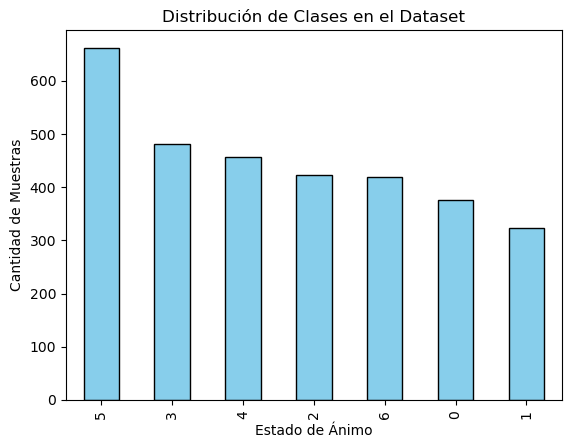

In [39]:


# Contar cuántos ejemplos hay por cada estado de ánimo
class_counts = df_final_label['estado_animo'].value_counts()

# Mostrar distribución
print(class_counts)
# Gráfico de barras para visualizar el balance de clases
class_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Estado de Ánimo")
plt.ylabel("Cantidad de Muestras")
plt.title("Distribución de Clases en el Dataset")
plt.show()


In [40]:
# Convertir a porcentaje
class_percentage = class_counts / class_counts.sum() * 100
print(class_percentage)


estado_animo
5    21.089519
3    15.323351
4    14.526919
2    13.475629
6    13.348200
0    11.946480
1    10.289901
Name: count, dtype: float64


El dataset se encuentra balanceado (ninguno es mayor a 80%)
Se aplica GridSeach para mejorar el modelo al ajustar hiperparámetros

In [ ]:

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


In [42]:

# Crear el clasificador
model_gs = xgb.XGBClassifier(n_estimators=200, learning_rate=0.2, max_depth=3)

# Entrenar el modelo
model_gs.fit(X_train, y_train)

# Hacer predicciones
y_pred_gs = model_gs.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred_gs)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.9363


Evaluamos métricas

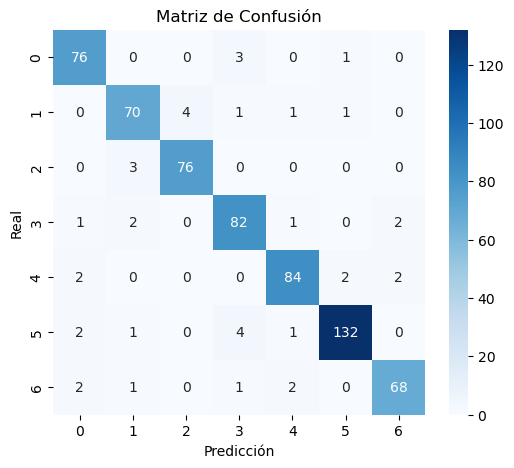

In [43]:


# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_gs)

# Visualizar la matriz de confusión
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


In [44]:


report = classification_report(y_test, y_pred_gs)
print(report)


              precision    recall  f1-score   support

           0       0.92      0.95      0.93        80
           1       0.91      0.91      0.91        77
           2       0.95      0.96      0.96        79
           3       0.90      0.93      0.92        88
           4       0.94      0.93      0.94        90
           5       0.97      0.94      0.96       140
           6       0.94      0.92      0.93        74

    accuracy                           0.94       628
   macro avg       0.93      0.94      0.93       628
weighted avg       0.94      0.94      0.94       628



In [45]:
from sklearn.metrics import roc_auc_score,roc_curve, auc

#ROC-AUC Score (Para modelos multiclase con probabilidad)

# Para modelos multiclase, usamos "ovr" (one-vs-rest)
y_proba = model_gs.predict_proba(X_test)  # Obtener probabilidades
roc_auc = roc_auc_score(y_test, y_proba, multi_class="ovr")
print(f'ROC-AUC Score: {roc_auc:.2f}')


ROC-AUC Score: 1.00


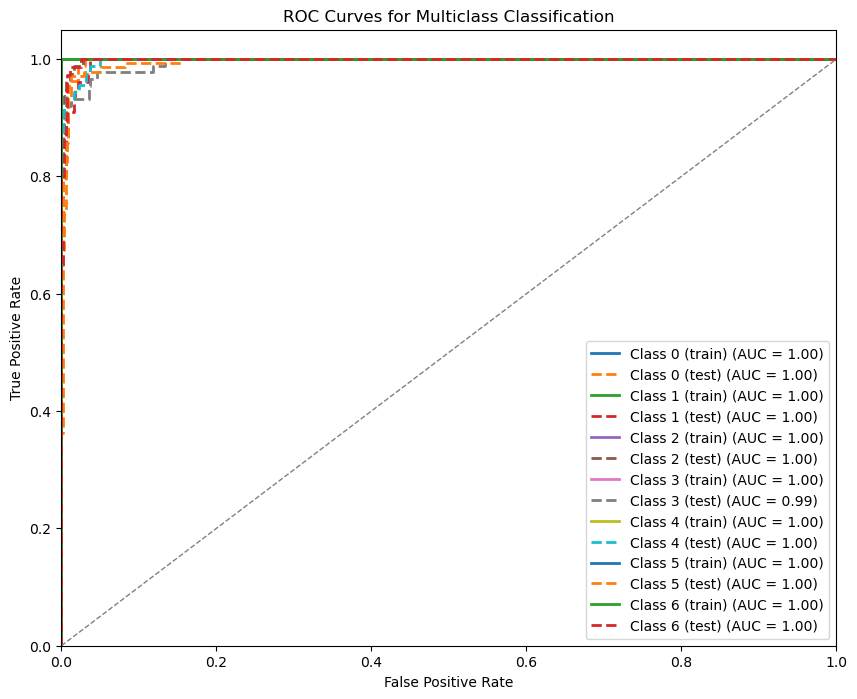

Accuracy en entrenamiento: 1.0000
Accuracy en prueba: 0.9363


In [46]:


# Obtener las probabilidades predichas para el conjunto de entrenamiento y prueba
y_train_pred_prob = model_gs.predict_proba(X_train)
y_test_pred_prob = model_gs.predict_proba(X_test)

# Binarizar las etiquetas si es un problema multiclase
n_classes = len(np.unique(y_train))
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Graficar las curvas ROC para cada clase (one-vs-rest)
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    # Calcular la curva ROC para la clase i
    fpr_train, tpr_train, _ = roc_curve(y_train_bin[:, i], y_train_pred_prob[:, i])
    roc_auc_train = auc(fpr_train, tpr_train)
    
    fpr_test, tpr_test, _ = roc_curve(y_test_bin[:, i], y_test_pred_prob[:, i])
    roc_auc_test = auc(fpr_test, tpr_test)
    
    # Graficar las curvas ROC
    plt.plot(fpr_train, tpr_train, lw=2, label=f'Class {i} (train) (AUC = {roc_auc_train:.2f})')
    plt.plot(fpr_test, tpr_test, lw=2, linestyle='--', label=f'Class {i} (test) (AUC = {roc_auc_test:.2f})')

# Graficar la línea de referencia (random classifier)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

# Configurar el gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()

# Calcular el accuracy en entrenamiento y prueba
y_train_pred = model_gs.predict(X_train)
y_test_pred = model_gs.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Accuracy en entrenamiento: {train_accuracy:.4f}")
print(f"Accuracy en prueba: {test_accuracy:.4f}")

Interpretación

Posible overfitting:
El hecho de que el accuracy en entrenamiento sea 1.0000 (perfecto) y en prueba sea 0.9363 (ligeramente menor) sugiere que podría haber un ligero overfitting.Sin embargo, la diferencia no es muy grande, por lo que el overfitting no es severo.

Rendimiento general:
Un accuracy de 0.9363 en prueba es muy bueno, lo que indica que el modelo generaliza bien a datos nuevos.
El overfitting, si existe, no está afectando significativamente el rendimiento del modelo.

In [47]:


# Reporte de clasificación para entrenamiento
print("Reporte de entrenamiento:")
print(classification_report(y_train, y_train_pred))

# Reporte de clasificación para prueba
print("Reporte de prueba:")
print(classification_report(y_test, y_test_pred))

Reporte de entrenamiento:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       295
           1       1.00      1.00      1.00       246
           2       1.00      1.00      1.00       344
           3       1.00      1.00      1.00       393
           4       1.00      1.00      1.00       366
           5       1.00      1.00      1.00       522
           6       1.00      1.00      1.00       345

    accuracy                           1.00      2511
   macro avg       1.00      1.00      1.00      2511
weighted avg       1.00      1.00      1.00      2511

Reporte de prueba:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        80
           1       0.91      0.91      0.91        77
           2       0.95      0.96      0.96        79
           3       0.90      0.93      0.92        88
           4       0.94      0.93      0.94        90
           5       0.97      0.94

Cross-Validattion para chequear overfitting

In [48]:


# Validación cruzada con 5 folds
cv_scores = cross_val_score(model_gs, X_train, y_train, cv=5, scoring='accuracy')

print(f"Accuracy en validación cruzada: {np.mean(cv_scores):.4f} (± {np.std(cv_scores):.4f})")

Accuracy en validación cruzada: 0.9415 (± 0.0109)


Qué significa esto?
Consistencia del modelo: El hecho de que el accuracy en validación cruzada sea cercano al accuracy en prueba (0.9415 vs 0.9363) indica que el modelo generaliza bien a datos nuevos.

Ligero overfitting: Aunque el accuracy en entrenamiento es perfecto (1.0000), la pequeña diferencia entre el accuracy en entrenamiento y prueba/validación cruzada sugiere que hay un ligero overfitting. Sin embargo, este overfitting no es severo, ya que el rendimiento en prueba y validación cruzada sigue siendo muy alto.

Solución posible: Regularización y reducción de complejidad

In [49]:
xgb_model = xgb.XGBClassifier(
    max_depth=3,  # Menor profundidad para evitar sobreajuste
    learning_rate=0.05,  # Aprendizaje más lento
    n_estimators=100,  # Menos árboles para no memorizar
    reg_alpha=0.1,  # Regularización L1 para eliminar variables irrelevantes
    reg_lambda=0.1  # Regularización L2 para evitar valores extremos
)

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_2 = xgb_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred_2)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.9283


No cambia significativamente